# Initialization

In [1]:
import TensorFlow
import Python

%include "InitMagic.swift"

# Define model parameters

In [2]:
struct Linear : ParameterGroup {
    var w, b: Tensor<Float>
}

# Define model

In [3]:
extension Linear : Model {
    func applied(to inputs: Tensor<Float>) -> Tensor<Float> {
        return inputs • w + b
    }
    
    func loss(for predictions: Tensor<Float>,
              labels: Tensor<Float>) -> Float {
        return (predictions - labels).squared().mean()
    }
}

%include "PostModelMagic.swift"

In [4]:
var model = Linear(w: 2 * Tensor<Float>(randomUniform: [13, 1]) - 1,
                   b: Tensor<Float>(0))
print(model)

Linear(w: [[-0.71061146], [-0.4260819], [0.035681844], [-0.26958132], [0.40289044], [-0.6997535], [-0.6214727], [-0.026487589], [-0.17089081], [0.64429986], [-0.29585624], [-0.58721066], [-0.66881406]], b: 0.0)


# Gradient (AutoDiff)

In [6]:
print(model.lossAndGradients(for: inputs, labels: labels))

(530.4809, __lldb_expr_10.Linear(w: [[20.247026], [17.05209], [17.894762], [21.039104], [20.89296], [19.085835], [0.5100403], [19.806055], [18.58769], [-95.40789], [15.36264], [-92.41427], [17.343945]], b: -42.21007))


# Training Loop

In [7]:
var sgd = SGD(learningRate: 0.001)
let stepCount = 500
var losses: [Float] = []
for step in 0..<stepCount {
    let (loss, grads) = model.lossAndGradients(for: inputs,
                                               labels: labels)
    losses.append(loss)
    if step % 100 == 0 {
        print("Step \(step) loss: \(loss)")
    }
    sgd.fit(&model, grads: grads)
}

Step 0 loss: 530.4809
Step 100 loss: 88.07281
Step 200 loss: 85.69998
Step 300 loss: 85.683105
Step 400 loss: 85.67957


# Plot loss using matplotlib

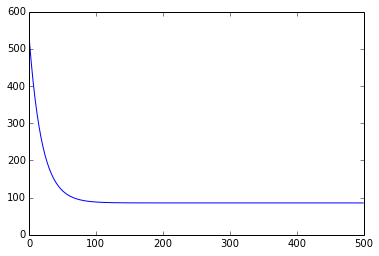

None


In [8]:
let plt = Python.import("matplotlib.pyplot")
plt.plot(losses)
plt.show()